In [70]:
#import selenium
import pandas as pd
from bs4 import BeautifulSoup
import time
import numpy
import os
from gensim import models, corpora
os.path.isfile('/Users/ava1posner/Downloads/Airline-Tweets.csv')

True

In [63]:
df=pd.read_csv('/Users/ava1posner/Downloads/Airline-Tweets.csv', encoding='latin-1')
df

,_unit_id,airline,name,retweet_count,text,tweet_created,tweet_id,tweet_location
0,681448150,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2/24/15 11:35,5.700000e+17,NaN
1,681448153,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2/24/15 11:15,5.700000e+17,NaN
2,681448156,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2/24/15 11:15,5.700000e+17,Lets Play
3,681448158,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2/24/15 11:15,5.700000e+17,NaN
4,681448159,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2/24/15 11:14,5.700000e+17,NaN
...,...,...,...,...,...,...,...,...
14635,681679794,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2/22/15 12:01,5.700000e+17,NaN
14636,681679795,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2/22/15 11:59,5.700000e+17,Texas
14637,681679796,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2/22/15 11:59,5.700000e+17,"Nigeria,lagos"
14638,681679797,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2/22/15 11:59,5.700000e+17,New Jersey


In [64]:
import pandas as pd
import re
import nltk
#nltk.download()

In [65]:
stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

def clean(text):
    text=re.sub(r'[^\w\s]',' ',text).lower()   ### Remove punctuation by removing non-space alpha-num characters
    words=re.split(r'\W+', text)                   ### Split by remaining non-alphanumeric characters 
    non_stop_words=[word for word in words if word not in stopword]        ### Remove stopwords
    lem_words= [wn.lemmatize(word) for word in non_stop_words]             ### Clean text ==
    clean_text= ' '.join(lem_words)
    return clean_text

In [66]:
df['clean_tweet']=df['text'].str.replace(r'[^\w\s]', ' ').str.lower()
#df

In [75]:
from textblob import TextBlob 

In [76]:
def get_sentiment(text):
    blob=TextBlob(text)
    return blob.sentiment

In [77]:
df['final_tweet'] = df['clean_tweet'].apply(clean)
df['sentiment']=df['final_tweet'].apply(get_sentiment)
df[['polarity','subjectivity']] = pd.DataFrame(df['sentiment'].values.tolist(), index=df.index)
df

,_unit_id,airline,name,retweet_count,text,tweet_created,tweet_id,tweet_location,clean_tweet,final_tweet,sentiment,polarity,subjectivity
0,681448150,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2/24/15 11:35,5.700000e+17,NaN,virginamerica what dhepburn said,virginamerica dhepburn said,"(0.0, 0.0)",0.000000,0.000000
1,681448153,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2/24/15 11:15,5.700000e+17,NaN,virginamerica plus you ve added commercials t...,virginamerica plus added commercial experienc...,"(0.0, 0.0)",0.000000,0.000000
2,681448156,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2/24/15 11:15,5.700000e+17,Lets Play,virginamerica i didn t today must mean i n...,virginamerica today must mean need take anoth...,"(-0.3125, 0.6875)",-0.312500,0.687500
3,681448158,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2/24/15 11:15,5.700000e+17,NaN,virginamerica it s really aggressive to blast...,virginamerica really aggressive blast obnoxio...,"(0.0062500000000000056, 0.35)",0.006250,0.350000
4,681448159,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2/24/15 11:14,5.700000e+17,NaN,virginamerica and it s a really big bad thing...,virginamerica really big bad thing,"(-0.3499999999999999, 0.3833333333333333)",-0.350000,0.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,681679794,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2/22/15 12:01,5.700000e+17,NaN,americanair thank you we got on a different f...,americanair thank got different flight chicago,"(0.0, 0.6)",0.000000,0.600000
14636,681679795,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2/22/15 11:59,5.700000e+17,Texas,americanair leaving over 20 minutes late flig...,americanair leaving 20 minute late flight war...,"(-0.3, 0.6)",-0.300000,0.600000
14637,681679796,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2/22/15 11:59,5.700000e+17,"Nigeria,lagos",americanair please bring american airlines to...,americanair please bring american airline bla...,"(0.0, 0.0)",0.000000,0.000000
14638,681679797,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2/22/15 11:59,5.700000e+17,New Jersey,americanair you have my money you change my ...,americanair money change flight answer phone ...,"(0.0, 0.0)",0.000000,0.000000


In [78]:
airline=df['airline']
#df

<AxesSubplot:>

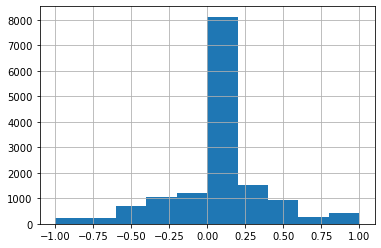

In [83]:
df.polarity.hist()

In [82]:
df.sort_values(by='polarity', ascending=False)

,_unit_id,airline,name,retweet_count,text,tweet_created,tweet_id,tweet_location,clean_tweet,final_tweet,sentiment,polarity,subjectivity
5910,681455972,Southwest,StevenRheaDelga,0,@SouthwestAir you should know the crew today o...,2/19/15 11:36,5.680000e+17,NaN,southwestair you should know the crew today o...,southwestair know crew today flight 1071 au p...,"(1.0, 1.0)",1.0,1.0
6233,681456485,Southwest,DavidJAbramson,0,@SouthwestAir planning a family trip to Orland...,2/18/15 9:56,5.680000e+17,Maryland and Washington D.C.,southwestair planning a family trip to orland...,southwestair planning family trip orlando may...,"(1.0, 0.3)",1.0,0.3
4647,681454639,Southwest,oxanniekateox,0,@SouthwestAir continues to prove to be the bes...,2/23/15 12:48,5.700000e+17,Twin Cities,southwestair continues to prove to be the bes...,southwestair continues prove best airline _ùõ,"(1.0, 0.3)",1.0,0.3
2554,681451971,United,DaRenton,0,@united I do I was on UA 495 LAX TO DEN - we a...,2/21/15 2:50,5.690000e+17,Colorado,united i do i was on ua 495 lax to den we a...,united ua 495 lax den scheduled land lax 7 38...,"(1.0, 0.3)",1.0,0.3
8478,681459441,Delta,msitver,0,@Jetblue Delay = Perfect time to learn Swift p...,2/18/15 17:06,5.680000e+17,"New York, New York",jetblue delay perfect time to learn swift p...,jetblue delay perfect time learn swift progra...,"(1.0, 1.0)",1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10974,681462269,US Airways,lj_verde,0,@USAirways never flying #USAirways again. Horr...,2/19/15 21:55,5.690000e+17,DC,usairways never flying usairways again horr...,usairways never flying usairways horrible exp...,"(-1.0, 1.0)",-1.0,1.0
13587,681678745,American,JonGroom90,1,@AmericanAir not only did you Cancelled Flight...,2/23/15 3:15,5.700000e+17,Bexleyheath,americanair not only did you cancelled flight...,americanair cancelled flight flight jfk delay...,"(-1.0, 1.0)",-1.0,1.0
2161,681451397,United,21stCenturyMom,0,@united has once again earned a place as the w...,2/21/15 19:19,5.690000e+17,NaN,united has once again earned a place as the w...,united earned place worst airline business,"(-1.0, 1.0)",-1.0,1.0
2431,681451707,United,dmb41shows,0,@united I would like 2 speak @United VP of #Cu...,2/21/15 11:06,5.690000e+17,Pursuit of Happiness,united i would like 2 speak united vp of cu...,united would like 2 speak united vp custexp j...,"(-1.0, 1.0)",-1.0,1.0


In [9]:
#2a 
#average sentiment for each airline 
#Calculate sentiment score for each tweet. Then calculate the average sentiments for each airline? Based your analysis, which airline is doing better ? 


#American
tweet_count_american=df.groupby(df['airline']).count().loc['American','_unit_id']
tweet_count_american

american = df.loc[df['airline'] == 'American']
american['polarity'].sum()/tweet_count_american

#Delta
tweet_count_delta=df.groupby(df['airline']).count().loc['Delta','_unit_id']
tweet_count_delta

delta = df.loc[df['airline'] == 'Delta']
delta['polarity'].sum()/tweet_count_delta

#Southwest
tweet_count_southwest=df.groupby(df['airline']).count().loc['Southwest','_unit_id']
tweet_count_southwest

southwest = df.loc[df['airline'] == 'Southwest']
southwest['polarity'].sum()/tweet_count_southwest

#US Airways
tweet_count_usairways=df.groupby(df['airline']).count().loc['US ','_unit_id']
tweet_count_usairways

american = df.loc[df['airline'] == 'American']
american['polarity'].sum()/tweet_count_american

#United
tweet_count_american=df.groupby(df['airline']).count().loc['American','_unit_id']
tweet_count_american

american = df.loc[df['airline'] == 'American']
american['polarity'].sum()/tweet_count_american

#Virgin American
tweet_count_american=df.groupby(df['airline']).count().loc['American','_unit_id']
tweet_count_american

american = df.loc[df['airline'] == 'American']
american['polarity'].sum()/tweet_count_american

KeyError: 'polarity'

In [84]:
#2b  Conduct aspect based sentiment analysis on the entire dataset to see what the most favorable and least favorable aspects of the airline industry are. 

dictionary=corpora.Dictionary(df['final_tweet'].str.split(' '))
?dictionary
corpus=[dictionary.doc2bow(text) for text in df['final_tweet'].str.split(' ')]

In [85]:
corpus[0:10]

[[(0, 2), (1, 1), (2, 1), (3, 1)],
 [(0, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(0, 2),
  (3, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1)],
 [(0, 1),
  (3, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1)],
 [(0, 1), (3, 1), (24, 1), (26, 1), (27, 1), (28, 1)],
 [(0, 1),
  (3, 1),
  (24, 1),
  (26, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1)],
 [(0, 2),
  (3, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1)],
 [(0, 1),
  (3, 1),
  (24, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1)],
 [(0, 1), (3, 1), (60, 1), (61, 1)],
 [(0, 2), (3, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1)]]

In [86]:
lda=models.LdaModel(corpus, id2word=dictionary, num_topics=10)
lda.get_topics().shape

(10, 14254)

In [87]:
for i in  range(10):
    print(lda.print_topic(i))

0.129*"" + 0.042*"americanair" + 0.030*"flight" + 0.028*"jetblue" + 0.019*"hour" + 0.013*"one" + 0.011*"u" + 0.011*"thanks" + 0.010*"hold" + 0.009*"cancelled"
0.110*"" + 0.087*"flight" + 0.032*"cancelled" + 0.023*"hour" + 0.020*"2" + 0.016*"flightled" + 0.014*"late" + 0.013*"hold" + 0.011*"plane" + 0.010*"get"
0.160*"" + 0.062*"americanair" + 0.054*"usairways" + 0.018*"flight" + 0.014*"get" + 0.013*"call" + 0.011*"phone" + 0.010*"help" + 0.010*"service" + 0.009*"customer"
0.047*"ever" + 0.041*"" + 0.041*"worst" + 0.030*"hang" + 0.017*"service" + 0.013*"customer" + 0.013*"empty" + 0.011*"rdu" + 0.011*"airline" + 0.009*"crazy"
0.165*"" + 0.142*"americanair" + 0.016*"southwestair" + 0.016*"flight" + 0.015*"get" + 0.012*"back" + 0.011*"need" + 0.010*"thanks" + 0.009*"please" + 0.009*"dfw"
0.112*"" + 0.088*"americanair" + 0.050*"co" + 0.049*"http" + 0.027*"usairways" + 0.020*"customer" + 0.018*"service" + 0.008*"american" + 0.007*"û" + 0.007*"airline"
0.043*"" + 0.022*"hung" + 0.018*"clt" +

In [88]:
lda.get_topic_terms(0)

[(0, 0.12871616),
 (1309, 0.042190455),
 (30, 0.02999309),
 (453, 0.028442975),
 (66, 0.019058486),
 (238, 0.012974263),
 (102, 0.010817936),
 (104, 0.01072038),
 (393, 0.0101403305),
 (470, 0.008602146)]

In [89]:
topic_words={}
for i in range(lda.num_topics):
    topic_words[i]=[dictionary[j] for (j, val) in lda.get_topic_terms(i)]

In [90]:
pd.DataFrame(topic_words)

,0,1,2,3,4,5,6,7,8,9
0,,,,ever,,,,,,jetblue
1,americanair,flight,americanair,,americanair,americanair,hung,jetblue,aa,
2,flight,cancelled,usairways,worst,southwestair,co,clt,time,flight,seat
3,jetblue,hour,flight,hang,flight,http,catering,americanair,u,southwestair
4,hour,2,get,service,get,usairways,issue,flight,bag,passenger
5,one,flightled,call,customer,back,customer,rep,next,voucher,_ù
6,u,late,phone,empty,need,service,bad,fly,never,notice
7,thanks,hold,help,rdu,thanks,american,automated,like,americanairlines,guy
8,hold,plane,service,airline,please,û,lack,treat,airline,flight
9,cancelled,get,customer,crazy,dfw,airline,upset,jfk,get,land


In [92]:
topic_dist=list(lda[corpus])
topic_dist


[[(0, 0.01993259),
  (1, 0.01993142),
  (2, 0.01993434),
  (3, 0.019934027),
  (4, 0.019932142),
  (5, 0.019930966),
  (6, 0.019931046),
  (7, 0.820609),
  (8, 0.019933961),
  (9, 0.019930536)],
 [(0, 0.012290023),
  (1, 0.012289935),
  (2, 0.75034815),
  (3, 0.15133187),
  (4, 0.012289707),
  (5, 0.012291129),
  (6, 0.012288432),
  (7, 0.012291153),
  (8, 0.01228967),
  (9, 0.012289929)],
 [(1, 0.27875048), (7, 0.6484921)],
 [(1, 0.5555146), (2, 0.17266071), (3, 0.11166617), (5, 0.113289714)],
 [(0, 0.014290465),
  (1, 0.01429048),
  (2, 0.014291251),
  (3, 0.014293134),
  (4, 0.014290785),
  (5, 0.87137383),
  (6, 0.014292382),
  (7, 0.014295322),
  (8, 0.014291233),
  (9, 0.0142910965)],
 [(4, 0.18772772), (8, 0.7588758)],
 [(4, 0.25746006), (5, 0.08028161), (7, 0.6134537)],
 [(1, 0.12717253), (5, 0.8097314)],
 [(0, 0.024898646),
  (1, 0.024897868),
  (2, 0.024900572),
  (3, 0.02489825),
  (4, 0.024901653),
  (5, 0.024899123),
  (6, 0.024895089),
  (7, 0.77590704),
  (8, 0.024899514

In [34]:
from gensim import matutils
topic_dist=matutils.corpus2dense(topic_dist, lda.num_topics).T
topic_dist

array([[0.01948531, 0.01950532, 0.01949438, ..., 0.01948303, 0.01950103,
        0.0194938 ],
       [0.01236752, 0.0123675 , 0.01236581, ..., 0.01236478, 0.01236523,
        0.01236518],
       [0.28359118, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.26989225, 0.01270337, 0.01271004, ..., 0.01270277, 0.01270238,
        0.41596296],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65739745, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [36]:
with_topics=pd.concat([df, pd.DataFrame(topic_dist, index=df.index)], axis='columns')
with_topics

,_unit_id,airline,name,retweet_count,text,tweet_created,tweet_id,tweet_location,clean_tweet,final_tweet,0,1,2,3,4,5,6,7,8,9
0,681448150,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2/24/15 11:35,5.700000e+17,NaN,virginamerica what dhepburn said,virginamerica dhepburn said,0.019485,0.019505,0.019494,0.019494,0.824571,0.019482,0.019490,0.019483,0.019501,0.019494
1,681448153,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2/24/15 11:15,5.700000e+17,NaN,virginamerica plus you ve added commercials t...,virginamerica plus added commercial experienc...,0.012368,0.012368,0.012366,0.542665,0.012367,0.012365,0.358406,0.012365,0.012365,0.012365
2,681448156,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2/24/15 11:15,5.700000e+17,Lets Play,virginamerica i didn t today must mean i n...,virginamerica today must mean need take anoth...,0.283591,0.000000,0.000000,0.000000,0.000000,0.000000,0.643644,0.000000,0.000000,0.000000
3,681448158,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2/24/15 11:15,5.700000e+17,NaN,virginamerica it s really aggressive to blast...,virginamerica really aggressive blast obnoxio...,0.114700,0.704921,0.000000,0.000000,0.126037,0.000000,0.000000,0.000000,0.000000,0.000000
4,681448159,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2/24/15 11:14,5.700000e+17,NaN,virginamerica and it s a really big bad thing...,virginamerica really big bad thing,0.014292,0.014294,0.014292,0.461682,0.423987,0.014291,0.014291,0.014289,0.014291,0.014291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,681679794,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2/22/15 12:01,5.700000e+17,NaN,americanair thank you we got on a different f...,americanair thank got different flight chicago,0.011115,0.267344,0.011113,0.011118,0.643744,0.011113,0.011116,0.011113,0.011112,0.011113
14636,681679795,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2/22/15 11:59,5.700000e+17,Texas,americanair leaving over 20 minutes late flig...,americanair leaving 20 minute late flight war...,0.876239,0.000000,0.000000,0.079303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14637,681679796,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2/22/15 11:59,5.700000e+17,"Nigeria,lagos",americanair please bring american airlines to...,americanair please bring american airline bla...,0.269892,0.012703,0.012710,0.225210,0.012707,0.012704,0.012706,0.012703,0.012702,0.415963
14638,681679797,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2/22/15 11:59,5.700000e+17,New Jersey,americanair you have my money you change my ...,americanair money change flight answer phone ...,0.000000,0.000000,0.000000,0.299393,0.000000,0.144755,0.497492,0.000000,0.000000,0.000000


In [37]:
with_topics.sort_values(by=0, ascending=False).head(10)

,_unit_id,airline,name,retweet_count,text,tweet_created,tweet_id,tweet_location,clean_tweet,final_tweet,0,1,2,3,4,5,6,7,8,9
1738,681450734,United,YelpPittsburgh,0,"@united Delayed 7 hrs flight 5721 PIT/IAD, fin...",2/22/15 13:28,5.700000e+17,"Pittsburgh, PA",united delayed 7 hrs flight 5721 pit iad fin...,united delayed 7 hr flight 5721 pit iad final...,0.961195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2117,681451353,United,Blondiemcl6,0,"@united not a good day to fly u, two delayed f...",2/21/15 21:08,5.690000e+17,somerville nj,united not a good day to fly u two delayed f...,united good day fly u two delayed flight stil...,0.960858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1038,681449754,United,nfranco,0,@united 20 min more delays to flt 2086 at sfo ...,2/23/15 12:25,5.700000e+17,NaN,united 20 min more delays to flt 2086 at sfo ...,united 20 min delay flt 2086 sfo 2 load 2 pax...,0.958032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304,681448790,Virgin America,snellbell,1,@VirginAmerica lost my luggage 4 days ago on f...,2/20/15 8:38,5.690000e+17,NaN,virginamerica lost my luggage 4 days ago on f...,virginamerica lost luggage 4 day ago flight v...,0.956836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1875,681451018,United,WayneMAaron,2,@united. Pls hold UA2066 for 9 cnx pax frm UA...,2/22/15 8:57,5.700000e+17,NaN,united pls hold ua2066 for 9 cnx pax frm ua...,united pls hold ua2066 9 cnx pax frm ua6194 r...,0.955862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1792,681450846,United,mbrooke_brooke,0,@united - so they changed depart from 1:45 to ...,2/22/15 11:41,5.700000e+17,NaN,united so they changed depart from 1 45 to ...,united changed depart 1 45 2 00pm amp 1 40pm ...,0.955479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181,681448553,Virgin America,joyabsalon,0,@VirginAmerica too bad you say it takes 10 to ...,2/21/15 18:29,5.690000e+17,Northern Virginia,virginamerica too bad you say it takes 10 to ...,virginamerica bad say take 10 14 day via conf...,0.953167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2493,681451840,United,smallestnode,0,@united bad idea to let 200 people back on the...,2/21/15 8:13,5.690000e+17,"Boston, MA",united bad idea to let 200 people back on the...,united bad idea let 200 people back terminal ...,0.952628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13025,681678180,American,avaflav13,0,@AmericanAir Was put on hold for 5.5 hrs then ...,2/23/15 12:32,5.700000e+17,NaN,americanair was put on hold for 5 5 hrs then ...,americanair put hold 5 5 hr got call back 11 ...,0.952627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
845,681449427,United,real_steve_ward,0,@united It's taken ~3 weeks for Cust Care to r...,2/23/15 18:55,5.700000e+17,Chicago / Orlando / airplanes,united it s taken 3 weeks for cust care to r...,united taken 3 week cust care respond case 84...,0.950584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

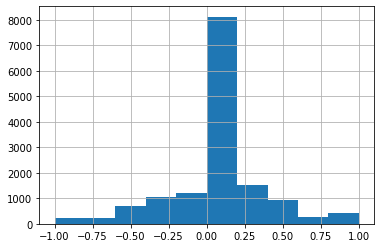

In [93]:
!pip install wordcloud
#conda install -c conda-forge wordcloud

In [94]:
dfpositive = df[df.polarity > 0.15]
#dfpositive

dfnegative = df[df.polarity < -0.15]
#dfnegative

In [95]:
dts=dfpositive['final_tweet']
from collections import Counter 
c = Counter(" ".join(dts).split()).most_common(5)
wordlist = pd.DataFrame(c, columns=['Word', 'Frequency'])
def removecommonwords(text):
    for word in wordlist["Word"]:
        text=re.sub(word,"",text).lower() 
    return text
dfpositive['final_tweet']=dfpositive['final_tweet'].apply(removecommonwords)
#dfpositive


<ipython-input-95-b3ae65e7e5e1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpositive['final_tweet']=dfpositive['final_tweet'].apply(removecommonwords)


In [96]:
dts=dfnegative['final_tweet']
from collections import Counter 
c = Counter(" ".join(dts).split()).most_common(3)
wordlist = pd.DataFrame(c, columns=['Word', 'Frequency'])
def removenegativecommonwords(text):
    for word in wordlist["Word"]:
        text=re.sub(word,"",text).lower() 
    return text
dfnegative['final_tweet']=dfnegative['final_tweet'].apply(removenegativecommonwords)
#dfnegative

<ipython-input-96-75e39508cf53>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnegative['final_tweet']=dfnegative['final_tweet'].apply(removenegativecommonwords)


In [97]:
dfneutral = df[(df['polarity'] > -0.15) & (df['polarity'] < 0.15)]
#dfneutral

In [98]:
dfpositivemap=dfpositive.groupby(['airline'])['final_tweet'].count().reset_index()
dfpositivemap

,airline,final_tweet
0,American,745
1,Delta,759
2,Southwest,811
3,US Airways,680
4,United,1033
5,Virgin America,183


In [99]:
dfnegativemap=dfnegative.groupby(['airline'])['final_tweet'].count().reset_index()
dfnegativemap

,airline,final_tweet
0,American,455
1,Delta,231
2,Southwest,316
3,US Airways,616
4,United,706
5,Virgin America,51


In [100]:
dfneutralmap=dfneutral.groupby(['airline'])['final_tweet'].count().reset_index()
dfneutralmap


,airline,final_tweet
0,American,1534
1,Delta,1214
2,Southwest,1278
3,US Airways,1585
4,United,2050
5,Virgin America,268


In [101]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 

<AxesSubplot:xlabel='airline'>

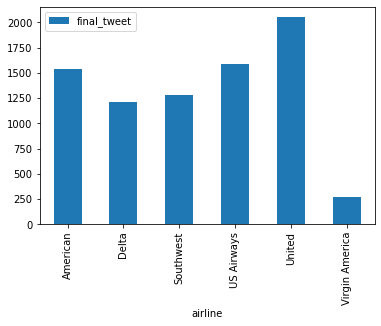

In [109]:
dfneutralmap.plot(kind='bar',x='airline',y='final_tweet')

In [111]:
!pip install matplotlib

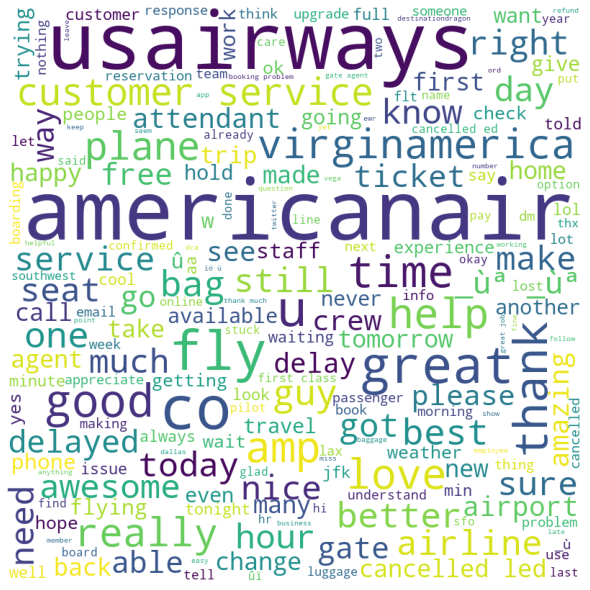

In [112]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plot 

words = '' 
stopwords = set(STOPWORDS)   
for item in dfpositive.final_tweet:       
    item = str(item) 
    tk = item.split() 
    for i in range(len(tk)): 
        tk[i] = tk[i].lower() 
      
    words += " ".join(tk)+" "
wordcld = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
                          
plot.figure(figsize = (8, 8), facecolor = None) 
plot.imshow(wordcld) 
plot.axis("off") 
plot.tight_layout(pad = 0)  
plot.show() 

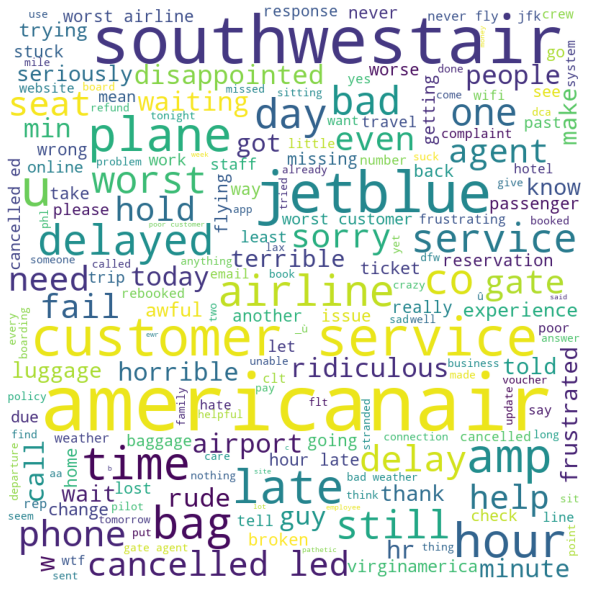

In [114]:
from wordcloud import WordCloud, STOPWORDS  
words = '' 
stopwords = set(STOPWORDS)   
for item in dfnegative.final_tweet:       
    item = str(item) 
    tk = item.split() 
    for i in range(len(tk)): 
        tk[i] = tk[i].lower() 
      
    words += " ".join(tk)+" "
wordcld = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
                          
plot.figure(figsize = (8, 8), facecolor = None) 
plot.imshow(wordcld) 
plot.axis("off") 
plot.tight_layout(pad = 0)  
plot.show() 